This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [39]:
import tensorflow
#load tensorflow module
#AJOUT 

In [40]:
tensorflow.keras.datasets.mnist.load_data?
#q°mark is to see characteristic of f°
#AJOUT

In [41]:
(train_images, train_labels), (test_images, test_labels) = tensorflow.keras.datasets.mnist.load_data()
#ouput = loading data
#same as lines 4&6
#AJOUT

In [42]:
from tensorflow.keras.datasets import mnist 
#like importing from a library, mnist is a dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
#this is how we load dataset.
#same as line 3&6

In [43]:
import tensorflow as tf
#renommer tensorflow module pour un nom plus court
#AJOUT

In [44]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
#same as lines 3&4
#AJOUT

**We are now gonna check the data "*train_images*" "*train_labels*" "*test_images*" "*test_labels*"**

In [46]:
train_images
#see this data
#AJOUT

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [47]:
train_images.shape
#Check the shape of the data
#we have 60000 number of datasets for each one it's 28x28 fixers

(60000, 28, 28)

In [48]:
len(train_labels)
#Lengh of train_labels is 60000

60000

In [49]:
train_labels
#see the data
#sequence of numbers

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [50]:
test_images.shape
#for the test set we have 10000 observations 

(10000, 28, 28)

In [51]:
len(test_labels)
#lengh of test_labels is 10000

10000

In [52]:
test_labels
#see the data 

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

**First newark network example ***

In [53]:
from tensorflow import keras
from tensorflow.keras import layers #we define our model using layers from tf keras
#to import the dense layers, we need to import layers defined from the keras
model = keras.Sequential([
#using sequential layer design we can define the model sequentially
    layers.Dense(512, activation="relu"),
#dimension of layer 1 is "512" the activation f° sigma is "relu"
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [54]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#optimizer=mechanism through which the network will update itself based on the data it sees and its loss function
#loss f°=how the network measure its performance
#metrics to monitor during training and testing = accuracy

#at the training stage we are monitoring this metric value to see if it increases or decreases

**Preparing the image data**

In [55]:
train_images[0].shape
#look at the dim of the first data set of train_images (0)
#its (28,28)

(28, 28)

In [56]:
#we would like to change this dimension w/ 2 element for just dimension w/ just 1 element. 
train_images = train_images.reshape((60000, 28 * 28))

In [57]:
train_images[0].shape
#now the dim is (784,)

(784,)

In [58]:
#As a result the shape of the all training images become (60000, 784)
train_images.shape

(60000, 784)

In [59]:
#Now let's take a look again at the first train data
train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [60]:
#to normalize the values of the first training data (which are from 0 to 255 we divide by 255)
train_images = train_images.astype("float32") / 255

In [61]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [26]:
#we want to rescale the values from [0,255] to [0,1] so we divide by 255

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [62]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
#epochs=5 means we are using the training data 5 times
#batch_size means every iterations of the training we are using 128 batch size. 

#in the first round we have 60000 number of obs°
#60000/128 (betch_size) = number of updates. 

#we proceed the training procedure using the previously defined mdoel with 2 layers. 

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2579 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1034 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0679 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0494 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.9884


In [63]:
#Finally we check the summary after this training
#The first dense layer output is 512 and there are 401920 values
#number of weight parameters inside of the W1 matrix and b1 matrix is 401920
#the W1 matrix is 784x512
#dim of b1 is 512
#W1X+b1 = 784x512+512
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Using the model to make predictions**

In [64]:
test_images.shape
#we have 10000 of test_images

(10000, 784)

In [65]:
test_digits = test_images[0:10] #we take the first 10

In [69]:
#then we run this previous code to obtain the result (10, 784)
test_digits.shape

(10, 784)

In [70]:
test_digits = test_images[0:10] #we take the first 10
predictions = model.predict(test_digits) #we predicted the model for the first 10
predictions[0] #we check the first prediction 

#as we can see the largest value is the prediction 7

array([6.0776678e-10, 2.9022100e-09, 7.8647383e-07, 2.4045591e-04,
       1.0350334e-10, 1.3436338e-07, 2.7542581e-13, 9.9973649e-01,
       6.1237998e-08, 2.2096736e-05], dtype=float32)

In [71]:
# the prediction '7' has the largest value
predictions[0].argmax()

7

In [72]:
#the preduction value of 7 is '0.997365'
predictions[0][7]

0.9997365

In [73]:
test_labels[0]
#the prediction and value are both equal to '7' so we made a right prediction

7

**Evaluating the model on new data**

In [74]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"test_acc: {test_acc}")
#evaluate the model by comapring test_labels and the predicted value.  
#with the model.evaluate we feed the X= test_images and Y = test_labels for the test set and we get the evaluation score = test accuracy = 0.9767

313/313 [==============================] - 1s 3ms/step - loss: 0.0754 - accuracy: 0.9770
test_acc: 0.9769999980926514


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim

0

### Vectors (rank-1 tensors)

In [3]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [4]:
x.ndim

1

### Matrices (rank-2 tensors)

In [5]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [6]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [7]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
train_images.ndim

3

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

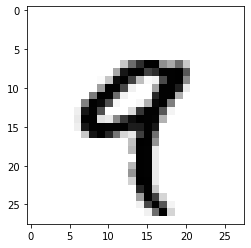

In [11]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [12]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [13]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [14]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [15]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [16]:
my_slice = train_images[:, 14:, 14:]

In [17]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [18]:
batch = train_images[:128]

In [19]:
batch = train_images[128:256]

In [20]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [21]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [22]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [23]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [24]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.36 s


### Broadcasting

In [25]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [26]:
y = np.expand_dims(y, axis=0)

In [27]:
Y = np.concatenate([y] * 32, axis=0)

In [28]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [29]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [30]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [31]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [32]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [33]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [34]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [35]:
train_images = train_images.reshape((60000, 28 * 28))

In [36]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [37]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [38]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [39]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [40]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [41]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [42]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [43]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

NameError: ignored

In [44]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

NameError: ignored

In [45]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

NameError: ignored

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [46]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [47]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [48]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [49]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [50]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [51]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [52]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [53]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [54]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.86
loss at batch 100: 2.27
loss at batch 200: 2.24
loss at batch 300: 2.11
loss at batch 400: 2.26
Epoch 1
loss at batch 0: 1.92
loss at batch 100: 1.91
loss at batch 200: 1.87
loss at batch 300: 1.75
loss at batch 400: 1.87
Epoch 2
loss at batch 0: 1.60
loss at batch 100: 1.61
loss at batch 200: 1.54
loss at batch 300: 1.45
loss at batch 400: 1.54
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.37
loss at batch 200: 1.27
loss at batch 300: 1.23
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.18
loss at batch 200: 1.07
loss at batch 300: 1.06
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.03
loss at batch 200: 0.92
loss at batch 300: 0.94
loss at batch 400: 0.98
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.92
loss at batch 200: 0.81
loss at batch 300: 0.84
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.83
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [55]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


## Summary